# The appoach of a Machine Learning problem

On a high level, the craft of creating machine learning (ML) processes is comprised of a number of steps:

**1. Decide on the question**. Most ML processes start by asking a question that cannot be answered by a simple conditional program or rules-based engine. These questions often revolve around predictions based on a collection of data.

**2. Collect and prepare data**. To be able to answer your question, you need data. The quality and, sometimes, quantity of your data will determine how well you can answer your initial question. Visualizing data is an important aspect of this phase. This phase also includes splitting the data into a training and testing group to build a model. This can be used via PCA, StandardScaler

**3. Choose a training method**. Depending on your question and the nature of your data, you need to choose how you want to train a model to best reflect your data and make accurate predictions against it. This is the part of your ML process that requires specific expertise and, often, a considerable amount of experimentation.

**4. Train the model**. Using your training data, you'll use various algorithms to train a model to recognize patterns in the data. The model might leverage internal weights that can be adjusted to privilege certain parts of the data over others to build a better model.

**5. Evaluate the model**. You use never before seen data (your testing data) from your collected set to see how the model is performing.

**6. Parameter tuning**. Based on the performance of your model, you can redo the process using different parameters, or variables, that control the behavior of the algorithms used to train the model.

**7. Predict**. Use new inputs to test the accuracy of your model.

# Multiple Classification Approaches

1. Logistic Regression
2. SVC
3. Random Forest Classifier
4. Decision Tree Classifier
5. Gaussian NB
6. Stochastic Gradient Descent
7. K-Nearest Neighbours

The data show that with the estimated salary and age, should people purchase a thing.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data= pd.read_csv('/content/Social_Network_Ads.csv') # Read data
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
x= data.iloc[:,:2]
y= data['Purchased']

y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

## Classification models

In [ ]:
model_names=[
             'Logistic Regression',
             'SVC',
             'Random Forest Classifier',
             'Decision Tree Classifier',
             'Gaussian NB',
             'Storechastic Gradient Descent',
             'KNN'
]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [ ]:
models= [
         LogisticRegression(),
         SVC(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         GaussianNB(),
         SGDClassifier(),
         KNeighborsClassifier()]

# Training model with and without Standard Scaler

## Without Standard Scaler approach

In [ ]:
def training_with_out_standard_scaler():

  print('*** Accuracy without Standard Scaler ***')

  model_scores=[]

  for model_name , model in zip(model_names,models):
    
    scores= cross_val_score(model,x,y)

    score=np.mean(scores)

    model_scores.append(score)

    print(f'{model_name} accuracy: ',"{:.2f}".format(score))
  
  return model_scores
    

## With Standard Scaler approach

In [ ]:
def training_with_standard_scaler():

  print('*** Accuracy with Standard Scaler ***')

  model_scores=[]

  for model_name , model in zip(model_names,models):

    pipeline=make_pipeline(StandardScaler(),model)
    
    scores= cross_val_score(pipeline,x,y)

    score=np.mean(scores)

    model_scores.append(score)

    print(f'{model_name} accuracy: ',"{:.2f}".format(score))
  
  return model_scores

# Evaluation

In [ ]:
training_with_out_standard_scaler_scores= training_with_out_standard_scaler()
print('\n\n')
training_with_standard_scaler_scores=training_with_standard_scaler()

*** Accuracy without Standard Scaler ***
Logistic Regression accuracy:  0.68
SVC accuracy:  0.77
Random Forest Classifier accuracy:  0.86
Decision Tree Classifier accuracy:  0.80
Gaussian NB accuracy:  0.89
Storechastic Gradient Descent accuracy:  0.59
KNN accuracy:  0.77



*** Accuracy with Standard Scaler ***
Logistic Regression accuracy:  0.83
SVC accuracy:  0.90
Random Forest Classifier accuracy:  0.86
Decision Tree Classifier accuracy:  0.81
Gaussian NB accuracy:  0.89
Storechastic Gradient Descent accuracy:  0.77
KNN accuracy:  0.89


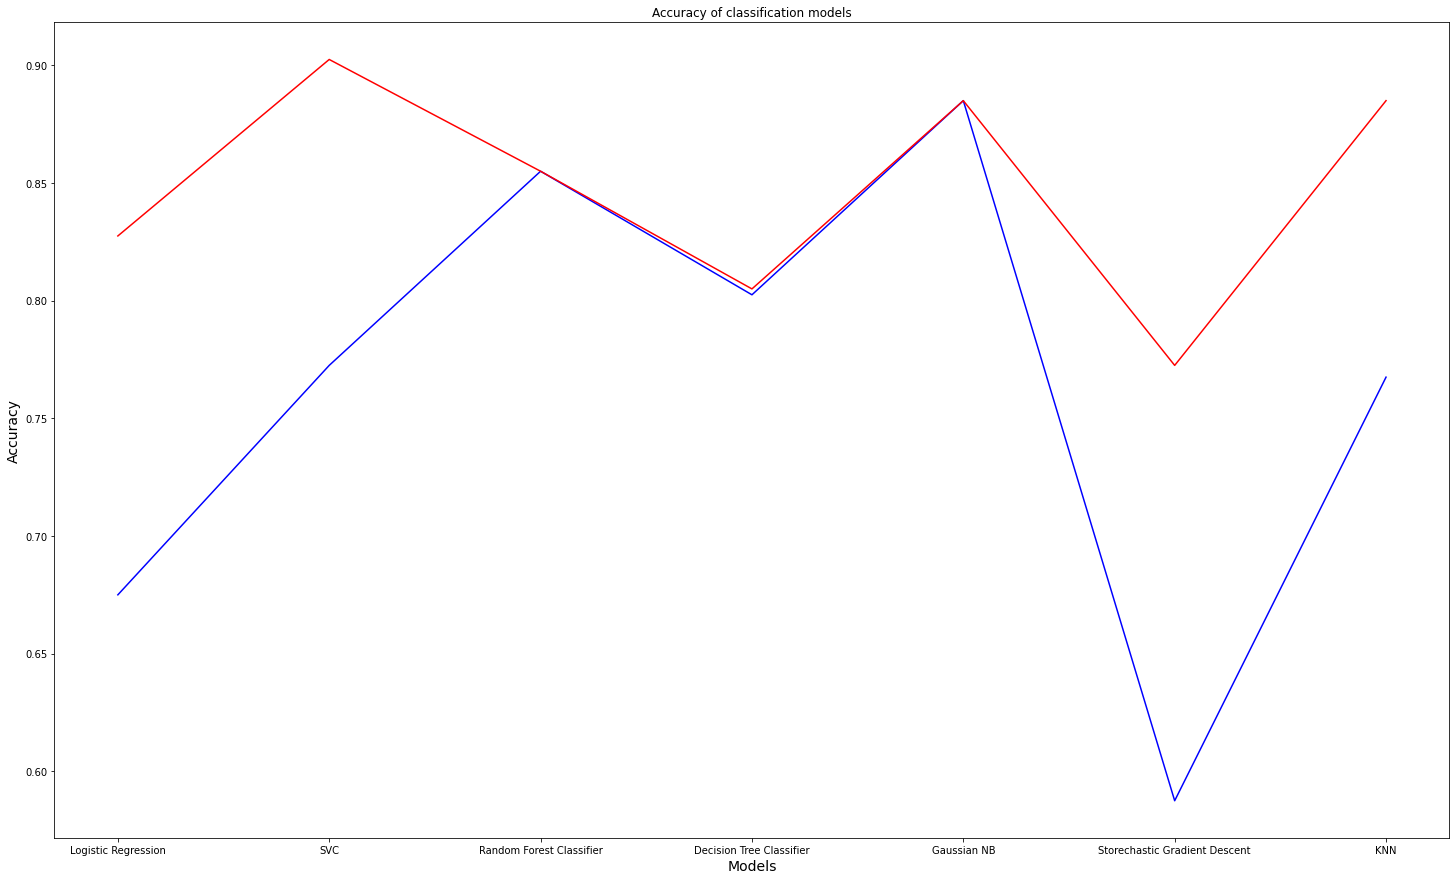

In [ ]:
figure=plt.figure()
figure.set_figwidth(25)
figure.set_figheight(15)

plt.title('Accuracy of classification models')
plt.xlabel('Models', fontSize=14)
plt.ylabel('Accuracy', fontSize=14)

plt.plot(model_names,training_with_out_standard_scaler_scores,color='Blue')
plt.plot(model_names,training_with_standard_scaler_scores,color='Red')

plt.show()

# Tunning parameters

## Using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_logistic_regression_params={
    'C':[1,10,100,1000],
    'gamma':[1,0.1,0.001,0.001,0.0001],
    'kernel':['linear','rbf']
}

In [ ]:
grid_logistic_regression=GridSearchCV(SVC(),grid_logistic_regression_params,refit=True,verbose=3)

grid_logistic_regression.fit(x,y)

grid_logistic_regression_scores=cross_val_score(grid_logistic_regression,x,y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.650 total time=  54.9s


In [ ]:
print(np.mean(grid_logistic_regression_scores))
print(grid_logistic_regression.best_params_)

In [ ]:
grid_params=[
    {
      'penalty':['l1','l2'],
      'C':[0.001,0.01,0.1,1.0,10.0,100.0,1000.0],
      'solver':['liblinear','saga']
    },
    {
      'C':[1.0,10.0,100.0,1000.0], 
     'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
     'gamma':['scale','auto'],
     'shrinking':[True,False],
     'decision_function_shape':['ovo','ovr']
    },
    {
      'n_estimators':[1,10,50,100,200,300,400],
      'criterion':['gini', 'ntropy'],
      'min_samples_split':[1,2,3,4],
      'max_features':['auto', 'sqrt', 'log2'],
    },
    {
        'criterion':['gini', 'ntropy'],
     'splitter':['best','random'],
     'min_samples_split':[1,2,3,4],
     'max_features':['auto', 'sqrt', 'log2'],
    },
    {
        
    },
    {
        'loss':[ 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error','huber', 'epsilon_insensitive'],
        'penalty':['l1','l2'],
        'alpha':[0.00001,0.0001,0.001,0.01,0.1,1.0,10,100],
        'learning_rate':['constant','optimal','invscaling','adaptive']
    },
    {
        'n_neighbors':[1,3,5,7,9],
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute']
    }
]

In [ ]:
def tunning_parameter_using_grid():

  grid_scores=[]

  for model,model_name,params in zip(models,model_names,grid_params):
    grid= GridSearchCV(model,params,refit=True,verbose=2)

    grid.fit(x,y)

    model_scores=cross_val_score(grid,x,y)

    model_score=np.mean(model_scores)

    print(f'{model_name} accuracy: ',"{:.2f}".format(model_score))

    grid_scores.append(model_score)
  
  return grid_scores
